<a href="https://colab.research.google.com/github/teob97/litebird_cr_simulator/blob/main/data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
import random
import scipy
import math

from keras.models import load_model
#from scipy import stats

In [ ]:
model = load_model('saved_model', compile = False)

In [ ]:
min_vector = np.load('normalization/norm_min.npy')
max_vector = np.load('normalization/norm_max.npy')

def denormalize(M_vec, m_vec, sample):
  
  for i in range(sample.shape[0]):
    for k in range(sample.shape[1]):
      M = np.mean(M_vec[k])
      m = np.mean(m_vec[k])
      sample[i,k,:] = m + (M-m)*(sample[i,k,:]+1)/2
  
  return sample

In [ ]:
z = np.random.normal(0,1, (100, 500))
g_data = model.predict(z)
g_data = denormalize(max_vector, min_vector, g_data)

<function matplotlib.pyplot.show>

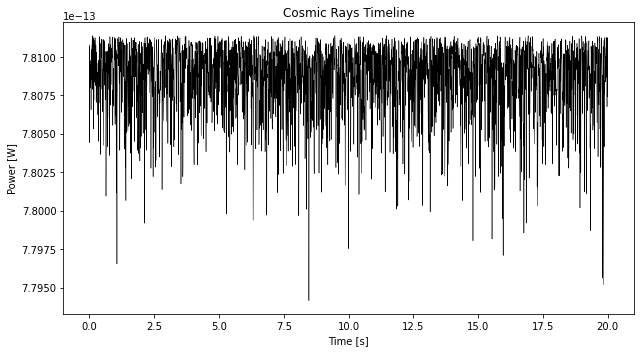

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(test[0,0,0], g_data[0,4], color = 'k', linewidth = 0.5)
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('Cosmic Rays Timeline')
plt.tight_layout()
plt.show

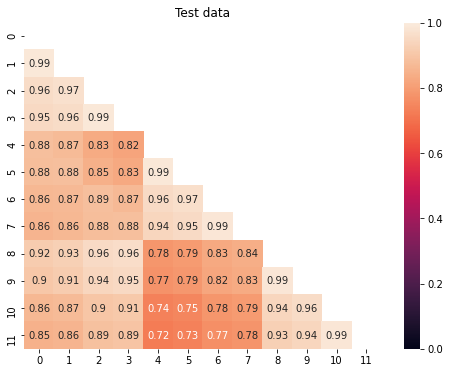

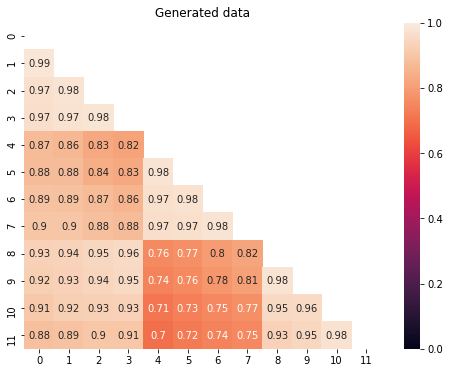

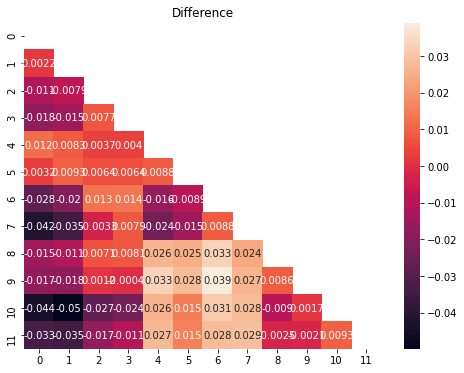

In [ ]:
z = np.random.normal(0.0, 1.0, (100, 500))
new = model.predict(z)
new = denormalize(max_vector, min_vector, new)

matrix_true = np.corrcoef(test[0,1])
for i in range(1,test.shape[0]):
  matrix_true += np.corrcoef(test[i,1])
matrix_true = matrix_true/test.shape[0]

matrix = np.corrcoef(new[0])
for i in range(1,new.shape[0]):
  matrix += np.corrcoef(new[i])
matrix = matrix/new.shape[0]

diff = matrix_true - matrix

mask = np.triu(np.ones_like(matrix, dtype=bool))

plt.figure(figsize = (8,6))
plt.title('Test data')
sns.heatmap(matrix_true, mask = mask, annot = True, vmin = 0, vmax = 1)
#plt.savefig('/content/drive/My Drive/Immagini_tesi/cmatrix_test.png')

plt.figure(figsize = (8,6))
plt.title('Generated data')
sns.heatmap(matrix, mask = mask, annot = True, vmin = 0, vmax = 1)
#plt.savefig('/content/drive/My Drive/Immagini_tesi/cmatix_generated.png')

plt.figure(figsize = (8,6))
plt.title('Difference')
sns.heatmap(diff, mask = mask, annot = True)

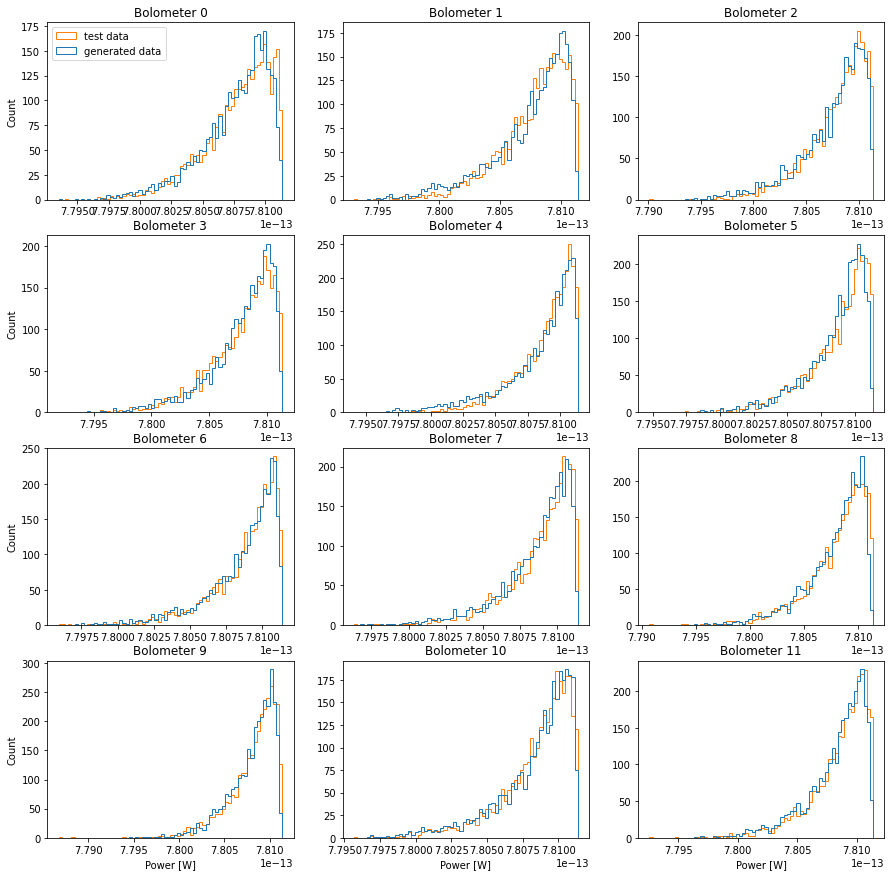

In [ ]:
fig, ax = plt.subplots(4,3,figsize = (15,15))

plt.setp(ax[-1, :], xlabel='Power [W]')
plt.setp(ax[:, 0], ylabel='Count')

for i in range(4):
  for k in range(3):
    ax[i,k].set_title('Bolometer ' + str(k + i*3))
    ax[i,k].hist([g_data[random.randint(0, g_data.shape[0]-1),k+i*3],test[random.randint(0,test.shape[0]-1),1,k+i*3]], 70,histtype = 'step', 
                 label=['generated data', 'test data'])
ax[0,0].legend(loc='upper left')

#plt.savefig('/content/drive/My Drive/Immagini_tesi/distributions_compared.png')

[Text(0, 0.5, 'Power [W]'),
 Text(0, 0.5, 'Power [W]'),
 Text(0, 0.5, 'Power [W]'),
 Text(0, 0.5, 'Power [W]')]

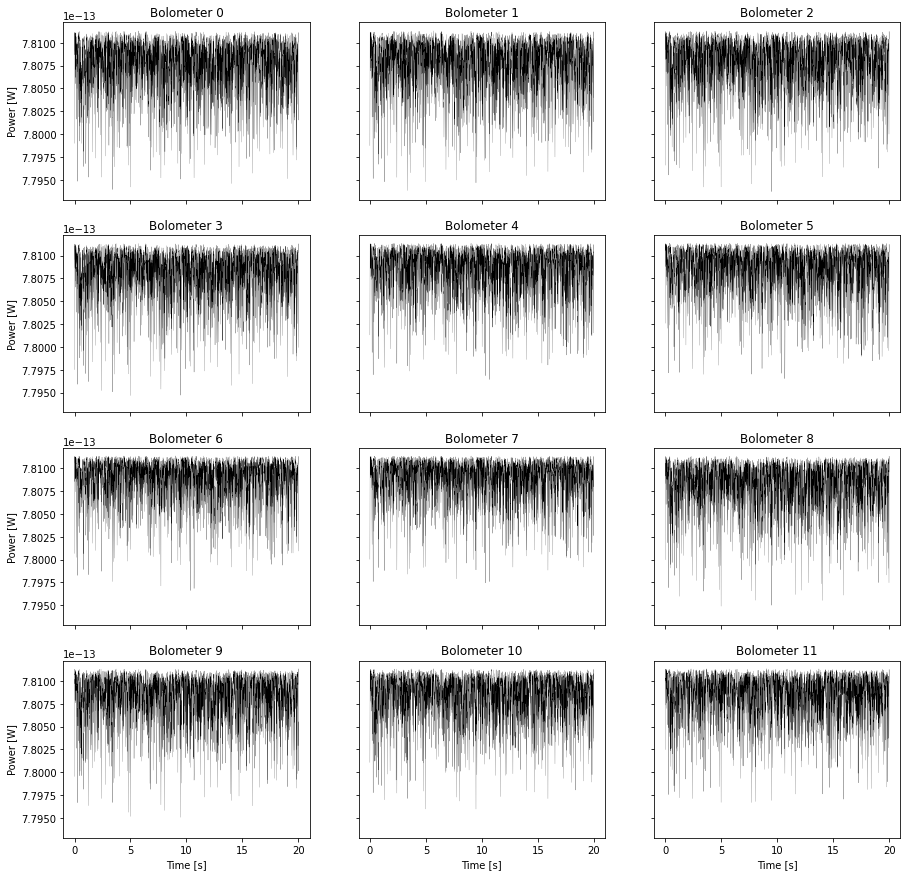

In [ ]:
fig, ax = plt.subplots(4, 3,figsize = (15,15), sharex=True, sharey=True)

for i in range(4):
  for k in range(3):
    ax[i,k].set_title('Bolometer ' + str(k + i*3))
    ax[i,k].plot(data[0,0,0], new[0,k+i*3], linewidth = 0.17, color = 'k')
plt.setp(ax[-1, :], xlabel='Time [s]')
plt.setp(ax[:, 0], ylabel='Power [W]')

#plt.savefig('/content/drive/My Drive/Immagini_tesi/data_generated.png')

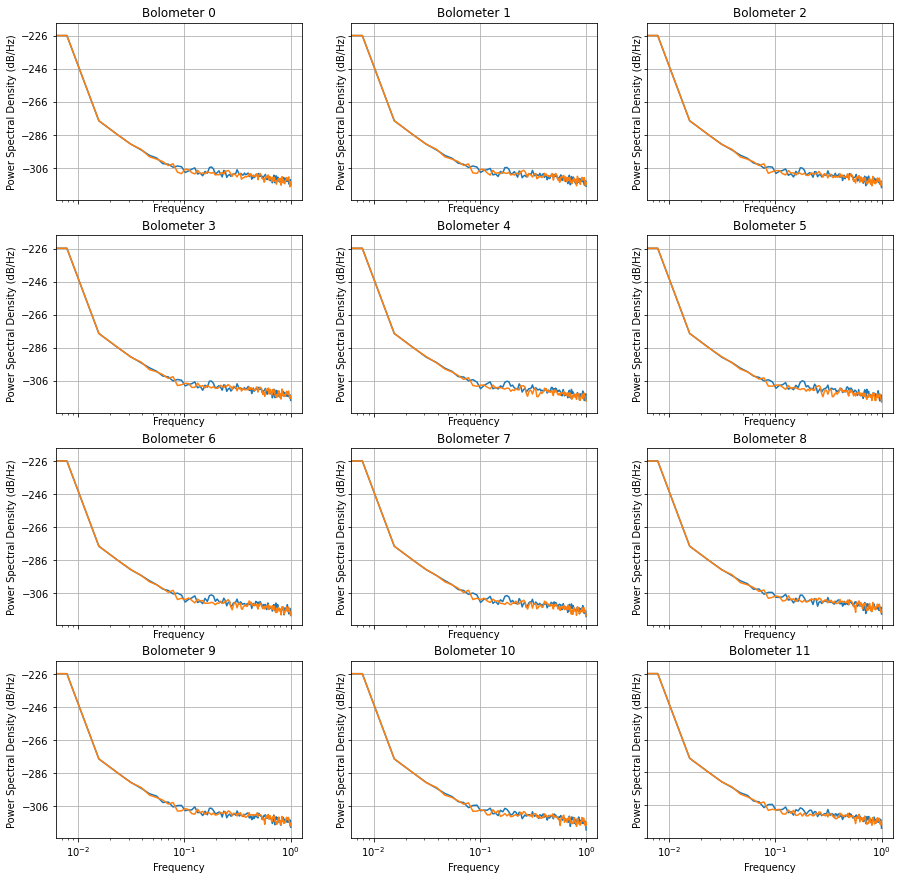

In [ ]:
#Calcolo dello spettro di potenza

_ , ax = plt.subplots(4,3,figsize = (15,15), sharey=True, sharex=True)

for i in range(4):
  for k in range(3):
    ax[i,k].set_title('Bolometer ' + str(k + i*3))
    ax[i,k].psd(new[0,k+i*3], label = 'generated')
    ax[i,k].psd(data[0,1,k+i*3], label = 'real')
    ax[i,k].set_xscale('log')
#plt.savefig('/content/drive/My Drive/Immagini_tesi/psd_compare.png')

In [ ]:
n = test.shape[0]
correlation_t = np.empty((12,5356))


for bol in range(12):
  step = 0
  for i in range(n):
    for k in range(i+1, n):
      correlation_t[bol,step] = np.corrcoef(test[k,1,bol], test[i,1,bol])[0,1]
      step = step+1

[Text(0, 0.5, 'Power [W]'),
 Text(0, 0.5, 'Power [W]'),
 Text(0, 0.5, 'Power [W]')]

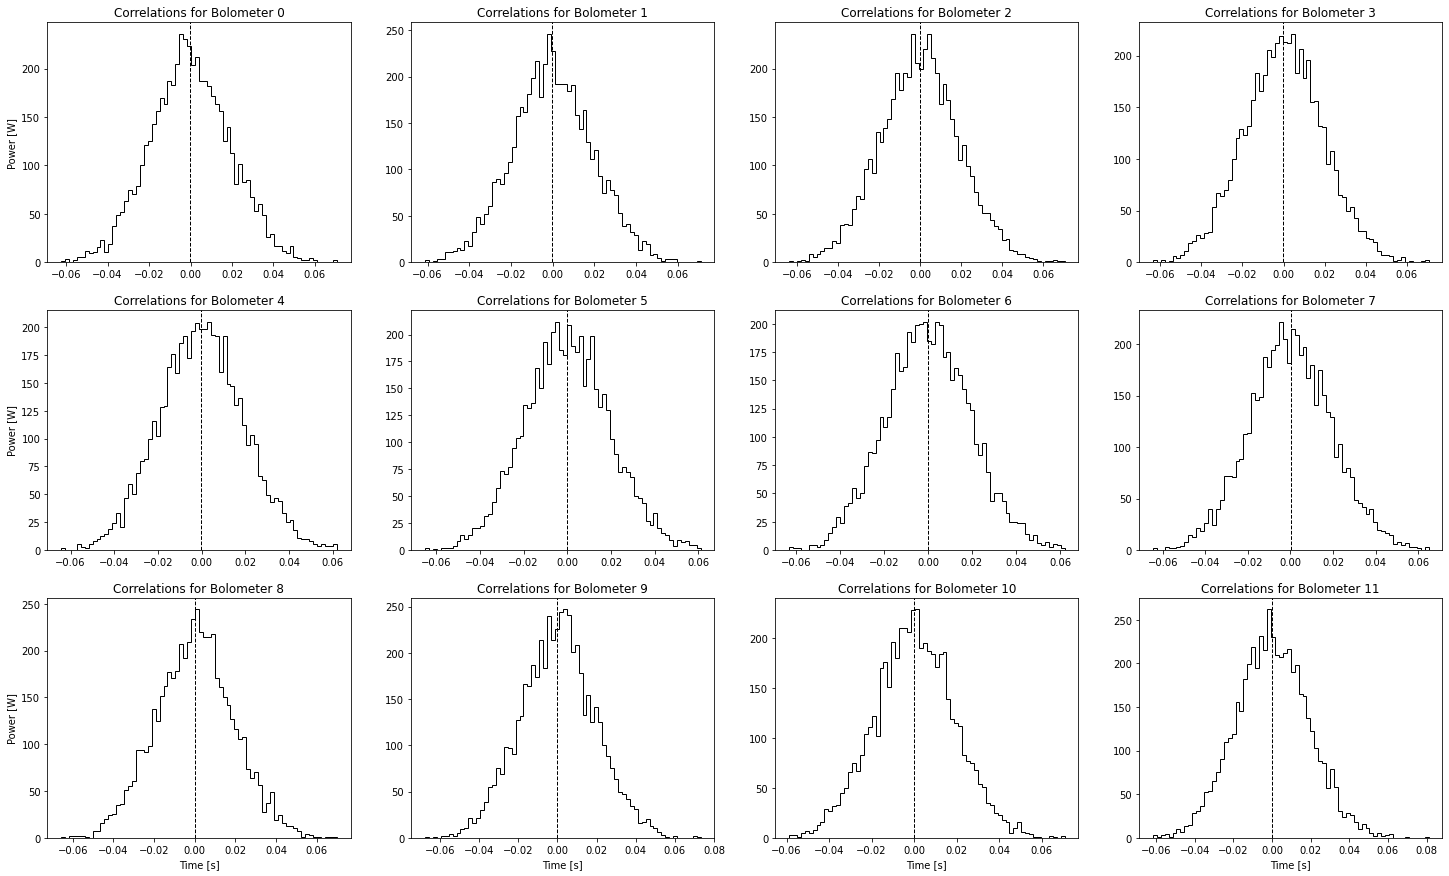

In [ ]:
_, ax = plt.subplots(3,4,figsize = (25,15))

for i in range(3):
  for k in range(4):
    ax[i,k].set_title('Correlations for Bolometer ' + str(k + i*4))
    ax[i,k].hist(correlation_t[k+i*4], 70, histtype = 'step', color = 'k')
    ax[i,k].axvline(correlation_t[k+i*4].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')
plt.setp(ax[-1, :], xlabel='Time [s]')
plt.setp(ax[:, 0], ylabel='Power [W]')

In [ ]:
n = g_data.shape[0]
correlation = np.empty((12,5356))

for bol in range(12):
  step = 0
  for i in range(n):
    for k in range(i+1, n):
      correlation[bol,step] = np.corrcoef(g_data[k,bol], g_data[i,bol])[0,1]
      step = step+1

In [ ]:
n = g_data.shape[0]
correlation_tg = np.empty((12,5356))

for bol in range(12):
  step = 0
  for i in range(n):
    for k in range(i+1, n):
      correlation_tg[bol,step] = np.corrcoef(g_data[k,bol], test[i,1,bol])[0,1]
      step = step+1

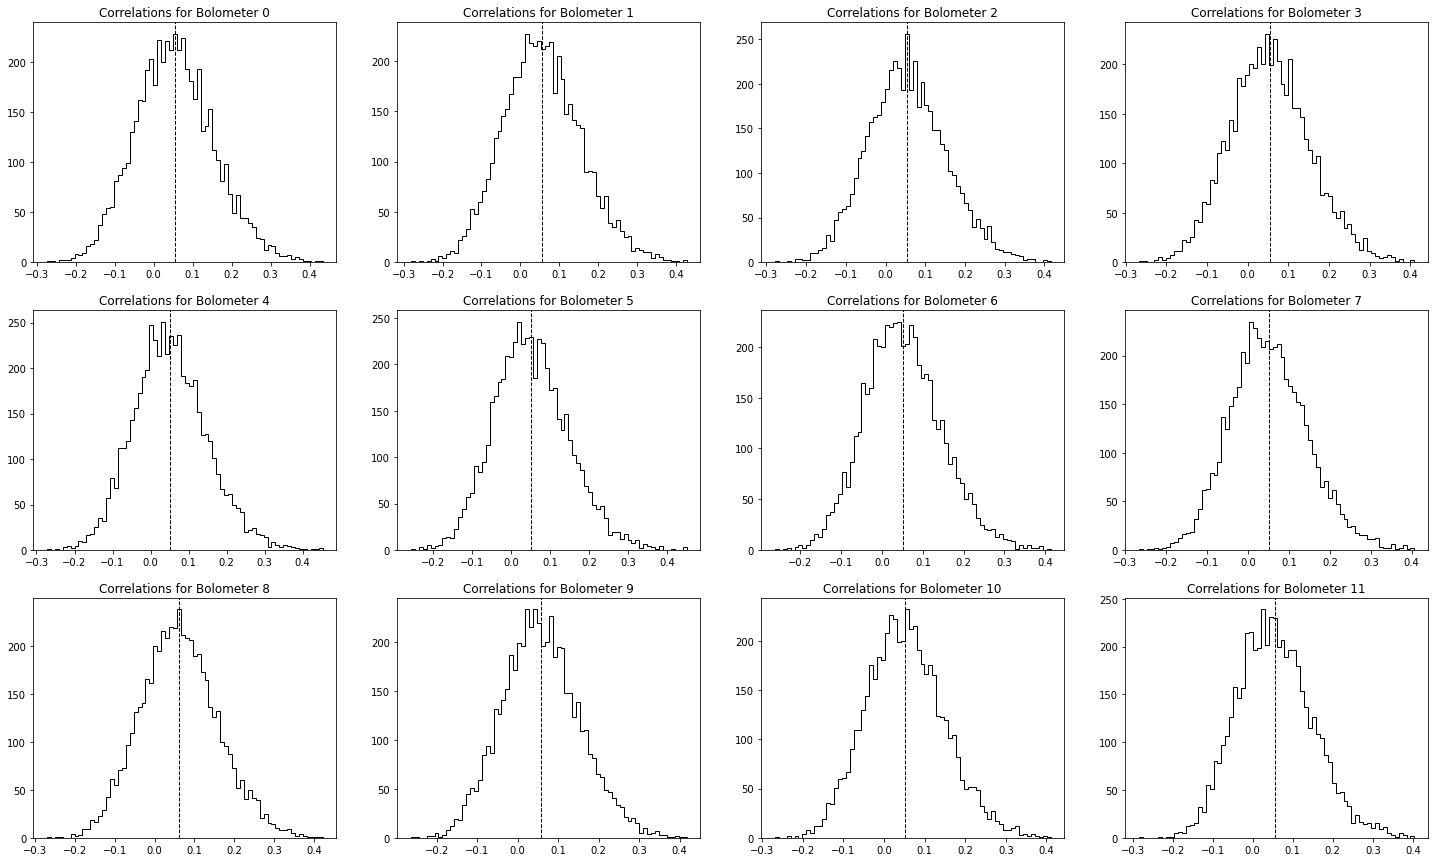

In [ ]:
_, ax = plt.subplots(3,4,figsize = (25,15))

for i in range(3):
  for k in range(4):
    ax[i,k].set_title('Correlations for Bolometer ' + str(k + i*4))
    ax[i,k].hist(correlation[k+i*4], 70, color = 'k', histtype = 'step')
    ax[i,k].axvline(correlation[k+i*4].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')

In [ ]:
mean_test = correlation_t.mean(axis=1)
std_test = correlation_t.std(axis=1)

mean_gen = correlation.mean(axis=1)
std_gen = correlation.std(axis=1)

mean_tg = correlation_tg.mean(axis=1)
std_tg = correlation_tg.std(axis=1)

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/norm_min',min_vector)
np.save('/content/drive/MyDrive/Colab Notebooks/norm_max',max_vector)